In [246]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

In [247]:
# Provide the file path to your local dataset
file_path = "/Users/mavingill/Downloads/Greece_Travel_Data/travel_tourism_dataset.csv"

# Load the dataset from the specified file
greece_travel_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
greece_travel_data.head()

,Trip #no.,Duration,Cost of Travel(Entire Trip),Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Date of Travel
0,55,1,20111,Flight,Hotel,Cristina,Fuentes,6/14/14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,9/13/22
1,288,5,29681,Car,Hotel,Patricia,Young,9/25/23,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,9/4/21
2,291,7,24950,Flight,Airbnb,Christina,Kirby,1/2/35,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,1/25/21
3,131,19,18676,Roadtrip,Airbnb,Michael,Hudson,4/21/82,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,1/28/22
4,281,28,18899,Flight,Airbnb,Francisco,Hensley,6/29/13,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,10/21/21


In [248]:
# Review the DataFrame
greece_travel_data.shape

(3000, 13)

In [249]:
# Review the DataFrame: Mode of Travel
unique_modes_of_travel = greece_travel_data['Mode of Travel'].value_counts()
print(unique_modes_of_travel)

Mode of Travel
Car         551
Bus         516
Cruise      501
Train       498
Roadtrip    473
Flight      461
Name: count, dtype: int64


In [250]:
# Review the DataFrame: Dates
dates = greece_travel_data['Date of Travel'].value_counts().sort_values(ascending=False)
print(dates)

# From June 2021 to July 2023

Date of Travel
7/7/23     9
9/20/20    8
1/29/20    8
9/7/22     8
3/3/22     8
          ..
3/31/21    1
7/12/20    1
2/15/22    1
3/20/22    1
6/19/21    1
Name: count, Length: 1194, dtype: int64


In [251]:
#Explore the datagrem: Date of Travel
grouped_date = greece_travel_data.groupby('Date of Travel')

In [252]:
date_counts = grouped_date.size()
print(date_counts)

Date of Travel
1/1/21     5
1/1/22     2
1/1/23     3
1/10/20    2
1/10/21    7
          ..
9/8/21     2
9/8/22     1
9/9/20     2
9/9/21     4
9/9/22     5
Length: 1194, dtype: int64


/var/folders/_8/6yz20cqn3h916cl84cktrsn40000gn/T/ipykernel_56294/3393026008.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  greece_travel_data['Date of Travel'] = pd.to_datetime(greece_travel_data['Date of Travel'])


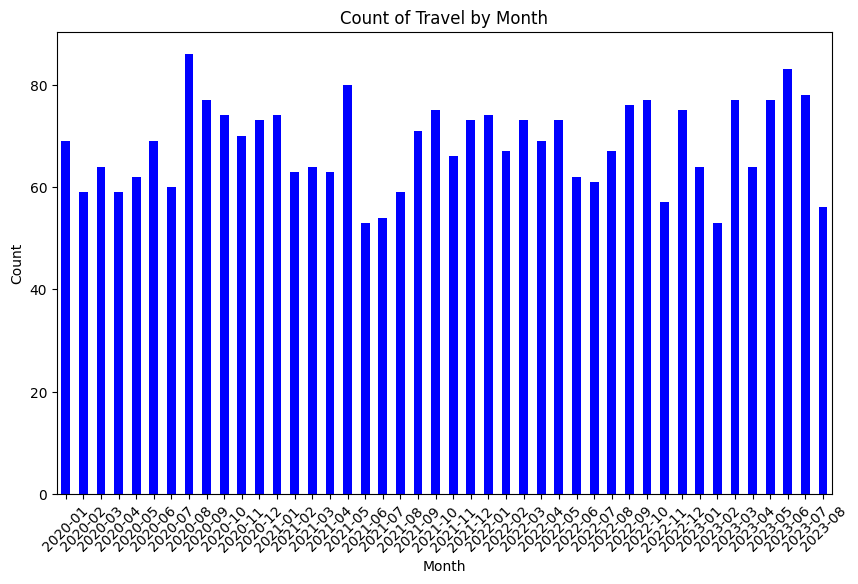

In [253]:
# Change 'Date of Travel' column in datetime format
greece_travel_data['Date of Travel'] = pd.to_datetime(greece_travel_data['Date of Travel'])

# Create a new column 'Month' to store the month information
greece_travel_data['Month'] = greece_travel_data['Date of Travel'].dt.strftime('%Y-%m')

# Group the data by month and count the occurrences
monthly_counts = greece_travel_data['Month'].value_counts().sort_index()

# Create a plot
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='blue')
plt.title('Count of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [254]:
# Explore Mode of Travel
grouped_travelmode = greece_travel_data.groupby('Mode of Travel')

In [255]:
travelmode_counts = grouped_travelmode.size()
print(travelmode_counts)

Mode of Travel
Bus         516
Car         551
Cruise      501
Flight      461
Roadtrip    473
Train       498
dtype: int64


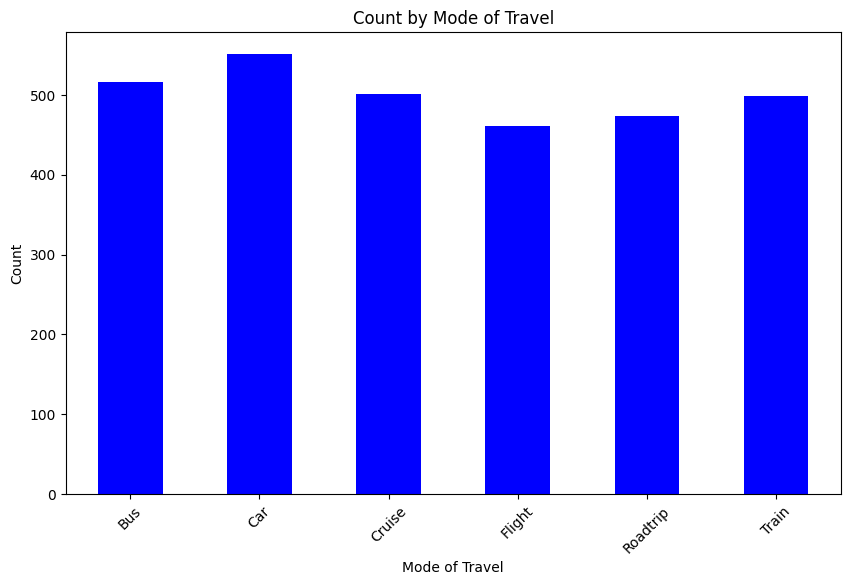

In [256]:
# Create a plot
plt.figure(figsize=(10, 6))
travelmode_counts.plot(kind='bar', color='blue')
plt.title('Count by Mode of Travel')
plt.xlabel('Mode of Travel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

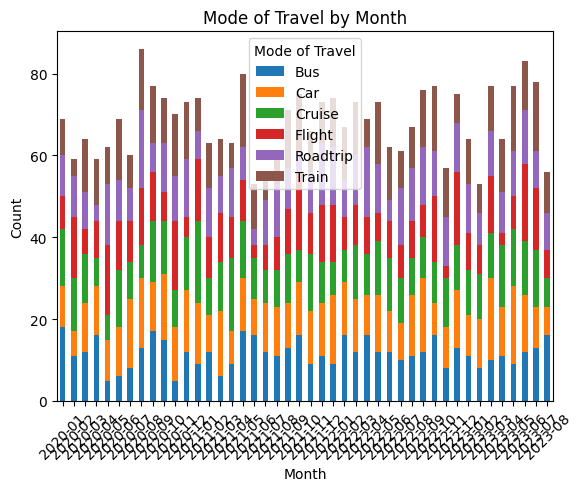

In [257]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your 'Date of Travel' column is not in datetime format
greece_travel_data['Date of Travel'] = pd.to_datetime(greece_travel_data['Date of Travel'])

# Create a new column 'Month' to store the month information
greece_travel_data['Month'] = greece_travel_data['Date of Travel'].dt.strftime('%Y-%m')

# Group the data by 'Month' and 'Mode of Travel', and count the occurrences
monthly_mode_counts = greece_travel_data.groupby(['Month', 'Mode of Travel']).size().unstack(fill_value=0)

# Create a plot
plt.figure(figsize=(12, 6))
monthly_mode_counts.plot(kind='bar', stacked=True)
plt.title('Mode of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode of Travel')
plt.show()

<Figure size 1200x600 with 0 Axes>

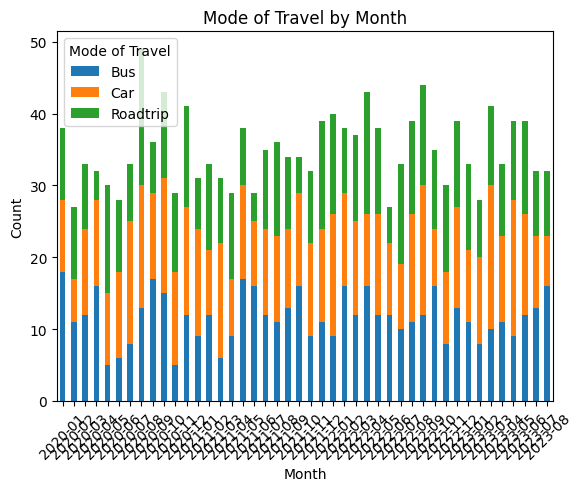

In [258]:
# Assuming your 'Date of Travel' column is not in datetime format
greece_travel_data['Date of Travel'] = pd.to_datetime(greece_travel_data['Date of Travel'])

# Create a new column 'Month' to store the month information
greece_travel_data['Month'] = greece_travel_data['Date of Travel'].dt.strftime('%Y-%m')

# Filter the DataFrame to include only certain modes of travel
modes_to_display = ['Bus', 'Car', 'Roadtrip']  # Replace with the modes you want to display
filtered_df = greece_travel_data[greece_travel_data['Mode of Travel'].isin(modes_to_display)]

# Group the filtered data by 'Month' and 'Mode of Travel', and count the occurrences
monthly_mode_counts = filtered_df.groupby(['Month', 'Mode of Travel']).size().unstack(fill_value=0)

# Create a plot
plt.figure(figsize=(12, 6))
monthly_mode_counts.plot(kind='bar', stacked=True)
plt.title('Mode of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode of Travel')
plt.show()

<Figure size 2400x1200 with 0 Axes>

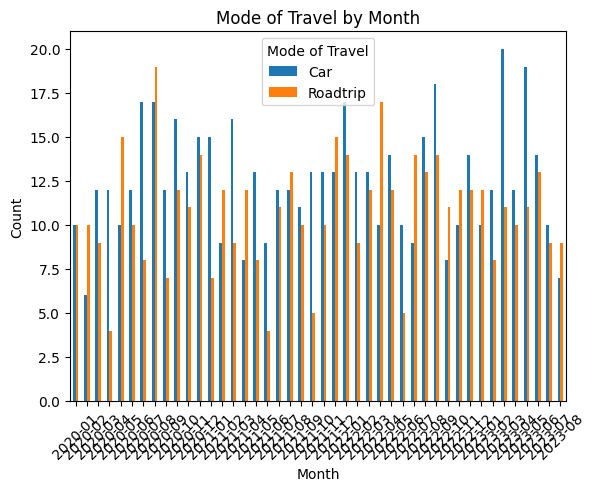

In [259]:
# Assuming your 'Date of Travel' column is not in datetime format
greece_travel_data['Date of Travel'] = pd.to_datetime(greece_travel_data['Date of Travel'])

# Create a new column 'Month' to store the month information
greece_travel_data['Month'] = greece_travel_data['Date of Travel'].dt.strftime('%Y-%m')

# Filter the DataFrame to include only certain modes of travel
modes_to_display = ['Car', 'Roadtrip']  # Replace with the modes you want to display
filtered_df = greece_travel_data[greece_travel_data['Mode of Travel'].isin(modes_to_display)]

# Pivot the filtered data to create separate columns for each mode
monthly_mode_counts = filtered_df.pivot_table(index='Month', columns='Mode of Travel', aggfunc='size', fill_value=0)

# Create a plot
plt.figure(figsize=(24, 12))
monthly_mode_counts.plot(kind='bar')
plt.title('Mode of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode of Travel')
plt.show()

<Figure size 2400x1200 with 0 Axes>

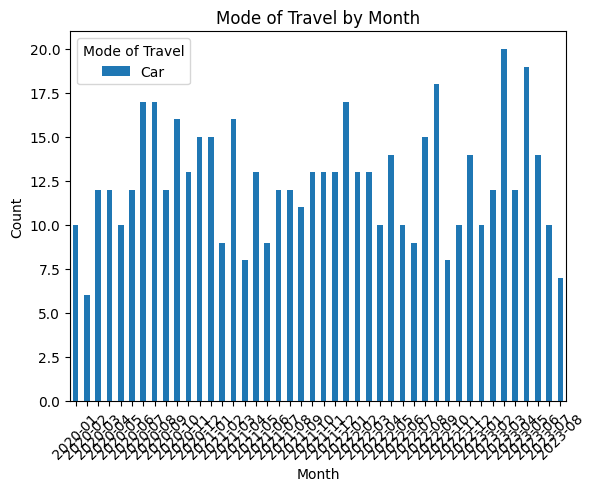

In [260]:
# Assuming your 'Date of Travel' column is not in datetime format
greece_travel_data['Date of Travel'] = pd.to_datetime(greece_travel_data['Date of Travel'])

# Create a new column 'Month' to store the month information
greece_travel_data['Month'] = greece_travel_data['Date of Travel'].dt.strftime('%Y-%m')

# Filter the DataFrame to include only certain modes of travel
modes_to_display = ['Car']  # Replace with the modes you want to display
filtered_df = greece_travel_data[greece_travel_data['Mode of Travel'].isin(modes_to_display)]

# Pivot the filtered data to create separate columns for each mode
monthly_mode_counts = filtered_df.pivot_table(index='Month', columns='Mode of Travel', aggfunc='size', fill_value=0)

# Create a plot
plt.figure(figsize=(24, 12))
monthly_mode_counts.plot(kind='bar')
plt.title('Mode of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mode of Travel')
plt.show()

In [261]:
# Explore Stay
unique_stay = greece_travel_data['Stay'].value_counts()
print(unique_stay)

Stay
Other      787
Airbnb     786
Hotel      724
Resorts    703
Name: count, dtype: int64


In [262]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = greece_travel_data['Stay']

# Separate the X variable, the features
X = greece_travel_data.drop("Stay", axis=1)

In [263]:
# Review the y variable Series
y[:5]

0     Hotel
1     Hotel
2    Airbnb
3    Airbnb
4    Airbnb
Name: Stay, dtype: object

In [264]:
# Review the X variable DataFrame
X.head()

,Trip #no.,Duration,Cost of Travel(Entire Trip),Mode of Travel,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Date of Travel,Month
0,55,1,20111,Flight,Cristina,Fuentes,6/14/14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,2022-09-13,2022-09
1,288,5,29681,Car,Patricia,Young,9/25/23,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,2021-09-04,2021-09
2,291,7,24950,Flight,Christina,Kirby,1/2/35,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,2021-01-25,2021-01
3,131,19,18676,Roadtrip,Michael,Hudson,4/21/82,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,2022-01-28,2022-01
4,281,28,18899,Flight,Francisco,Hensley,6/29/13,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,2021-10-21,2021-10


In [265]:
# Check the balance of target values
y.value_counts()

Stay
Other      787
Airbnb     786
Hotel      724
Resorts    703
Name: count, dtype: int64

In [266]:
# Split the date column into year, month, and day columns
greece_travel_data['Year'] = greece_travel_data['Date of Travel'].dt.year
greece_travel_data['Month'] = greece_travel_data['Date of Travel'].dt.month
greece_travel_data['Day'] = greece_travel_data['Date of Travel'].dt.day

# Drop columns 'Trip #no.' and 'Date of Travel' from the DataFrame
cleaned_df = greece_travel_data.drop(['Trip #no.', 'Date of Travel'], axis=1)

# Rename the 'Cost of Travel(Entire Trip)' to 'Cost of Travel(Entire Trip) in Euros'
cleaned_df = cleaned_df.rename(columns={'Cost of Travel(Entire Trip)': 'Cost of Travel(Entire Trip) in Euros'})

# Display the modified DataFrame
cleaned_df.head()

,Duration,Cost of Travel(Entire Trip) in Euros,Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Month,Year,Day
0,1,20111,Flight,Hotel,Cristina,Fuentes,6/14/14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,9,2022,13
1,5,29681,Car,Hotel,Patricia,Young,9/25/23,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,9,2021,4
2,7,24950,Flight,Airbnb,Christina,Kirby,1/2/35,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,1,2021,25
3,19,18676,Roadtrip,Airbnb,Michael,Hudson,4/21/82,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,1,2022,28
4,28,18899,Flight,Airbnb,Francisco,Hensley,6/29/13,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,10,2021,21


In [267]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(greece_travel_data)
dummies.head()

,Trip #no.,Duration,Cost of Travel(Entire Trip),Age,Date of Travel,Month,Year,Day,Mode of Travel_Bus,Mode of Travel_Car,...,Nationality_Uruguay,Nationality_Uzbekistan,Nationality_Vanuatu,Nationality_Venezuela,Nationality_Vietnam,Nationality_Wallis and Futuna,Nationality_Western Sahara,Nationality_Yemen,Nationality_Zambia,Nationality_Zimbabwe
0,55,1,20111,74,2022-09-13,9,2022,13,False,False,...,False,False,False,False,False,False,False,False,False,False
1,288,5,29681,19,2021-09-04,9,2021,4,False,True,...,False,False,False,False,False,False,False,False,False,False
2,291,7,24950,36,2021-01-25,1,2021,25,False,False,...,False,False,False,False,False,False,False,False,False,False
3,131,19,18676,38,2022-01-28,1,2022,28,False,False,...,False,False,False,False,False,False,False,False,False,False
4,281,28,18899,38,2021-10-21,10,2021,21,False,False,...,True,False,False,False,False,False,False,False,False,False


In [268]:
# Convert "Duration" to binary target variable
greece_travel_data['Duration'] = (greece_travel_data['Duration'] > 7).astype(int)

# Split our preprocessed data into our features and target arrays
y = greece_travel_data['Duration'].values
X = greece_travel_data.drop(columns='Duration').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [269]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd

# Convert X_train and y_train to Pandas DataFrames
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

# Define the model - deep neural net, input features, and hidden nodes
input_features_total = len(X_train.columns)
hidden_nodes_layer1 = 5
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features_total, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 80        
                                                                 
 dense_19 (Dense)            (None, 5)                 30        
                                                                 
 dense_20 (Dense)            (None, 1)                 6         
                                                                 
Total params: 116 (464.00 Byte)
Trainable params: 116 (464.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [270]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [271]:
print(X_train.columns)

RangeIndex(start=0, stop=15, step=1)


In [272]:
# Drop datetime columns from X_train
X_train = X_train.drop(X_train.columns[7], axis=1)

In [273]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')

In [274]:
input_features_total = len(X_train.columns)

In [275]:
# Check the shape of X_train to get the number of features
print(X_train.shape)  # This will print the shape of X_train

# Update input_features_total based on the correct number of features
input_features_total = X_train.shape[1]

# Define the model - deep neural net with updated input_features_total
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features_total, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile and train the model with the updated input
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train, y_train, epochs=100)

(2250, 14)
Epoch 1/100
71/71 [==============================] - 0s 357us/step - loss: nan - accuracy: 0.2244
Epoch 2/100
71/71 [==============================] - 0s 293us/step - loss: nan - accuracy: 0.2244
Epoch 3/100
71/71 [==============================] - 0s 304us/step - loss: nan - accuracy: 0.2244
Epoch 4/100
71/71 [==============================] - 0s 288us/step - loss: nan - accuracy: 0.2244
Epoch 5/100
71/71 [==============================] - 0s 286us/step - loss: nan - accuracy: 0.2244
Epoch 6/100
71/71 [==============================] - 0s 292us/step - loss: nan - accuracy: 0.2244
Epoch 7/100
71/71 [==============================] - 0s 289us/step - loss: nan - accuracy: 0.2244
Epoch 8/100
71/71 [==============================] - 0s 286us/step - loss: nan - accuracy: 0.2244
Epoch 9/100
71/71 [==============================] - 0s 287us/step - loss: nan - accuracy: 0.2244
Epoch 10/100
71/71 [==============================] - 0s 283us/step - loss: nan - accuracy: 0.2244
Epoch 11

In [276]:
# Ensure y_test is of type float32, similar to what you did for y_train
y_test = y_test.astype('float32')

# Convert X_test to float32, similar to what you did for X_train
X_test = X_test.astype('float32')

# Now, evaluate the model
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: could not convert string to float: 'Car'

In [ ]:
# Check if X_train and y_train are NumPy arrays
print("X_train is a NumPy array:", isinstance(X_train, np.ndarray))
print("y_train is a NumPy array:", isinstance(y_train, np.ndarray))

X_train is a NumPy array: True
y_train is a NumPy array: True


In [ ]:
print("X_train shape:", X_train.shape)
print("X_train data type:", X_train.dtype)
print("y_train shape:", y_train.shape)
print("y_train data type:", y_train.dtype)

X_train shape: (2250, 15)
X_train data type: object
y_train shape: (2250,)
y_train data type: int64


In [ ]:
column_names = X_train.columns
print("Column Names in X_train:")
print(column_names)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'